# Построение надежных моделей с перекрестной проверкой (кроссвалидацией) на Python
## Введение
В сегодняшнем руководстве мы рассмотрим различные методы перекрестной проверки в Sklearn, такие как перекрестная проверка в K-кратном размере, стратифицированная перекрестная проверка в K-кратном размере, перекрестная проверка без учета одного (LOOCV) и повторные случайные разбивки на тестовые и обучающие подвыборки. Мы рассмотрим, как эти методы перекрестной проверки помогают лучше оценивать модели машинного обучения, а также приведем примеры. 
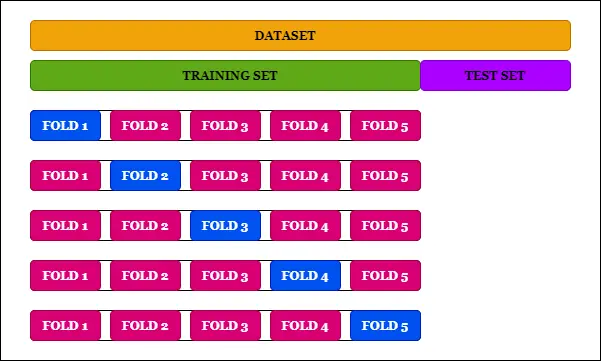

## Что такое перекрестная проверка в машинном обучении
Когда мы создаем модель машинного обучения с использованием методов обучения с учителем, очень важно оценить качество - точность и надежность модели, прежде чем запускать ее в эксплуатацию.
Ключевыми аспектами оценки качества модели являются –
- Насколько точна модель
- Насколько модель обладает обобщающей способоностью
Когда мы начинаем строить модель и обучать ее на "полном" наборе данных, мы можемполучить очень хорошую точность модели на основе этого обучающего набора данных. Но мы не можем протестировать, как эта модель будет вести себя с новыми данными, которых нет в обучающем наборе, следовательно, ее обобщающая способность не может быть определена.

Следовательно, нам нужны методы, позволяющие использовать один и тот же набор данных как для обучения, так и для тестирования моделей.
В машинном обучении перекрестная проверка - это метод оценки того, насколько хорошо обобщена модель и ее общая точность. Для этой цели он случайным образом отбирает данные из набора данных для создания обучающих и тестовых наборов. Существует несколько подходов к перекрестной проверке, а именно:
- Hold-out - подход (однократное разбиение)
- Перекрестная проверка с исключением примеров по одному (Leave One Out )
- K-кратная перекрестная проверка
- Стратифицированная K-кратная перекрестная проверка
- Повторное случайное разбиение на обучающую и тестовую выборку

### 1. Однократное разбиение (Hold-out - подход)
При таком подходе набор данных разбивается на обучающий и тестовый наборы со случайной выборкой. Обучающий набор используется для обучения модели, а тестовый набор используется для проверки ее точности на новых данных. Если обучение и точность почти одинаковы, то считается, что модель хорошо обобщена. Обычно 80% данных используется для обучения, а остальные 20% - для тестирования.
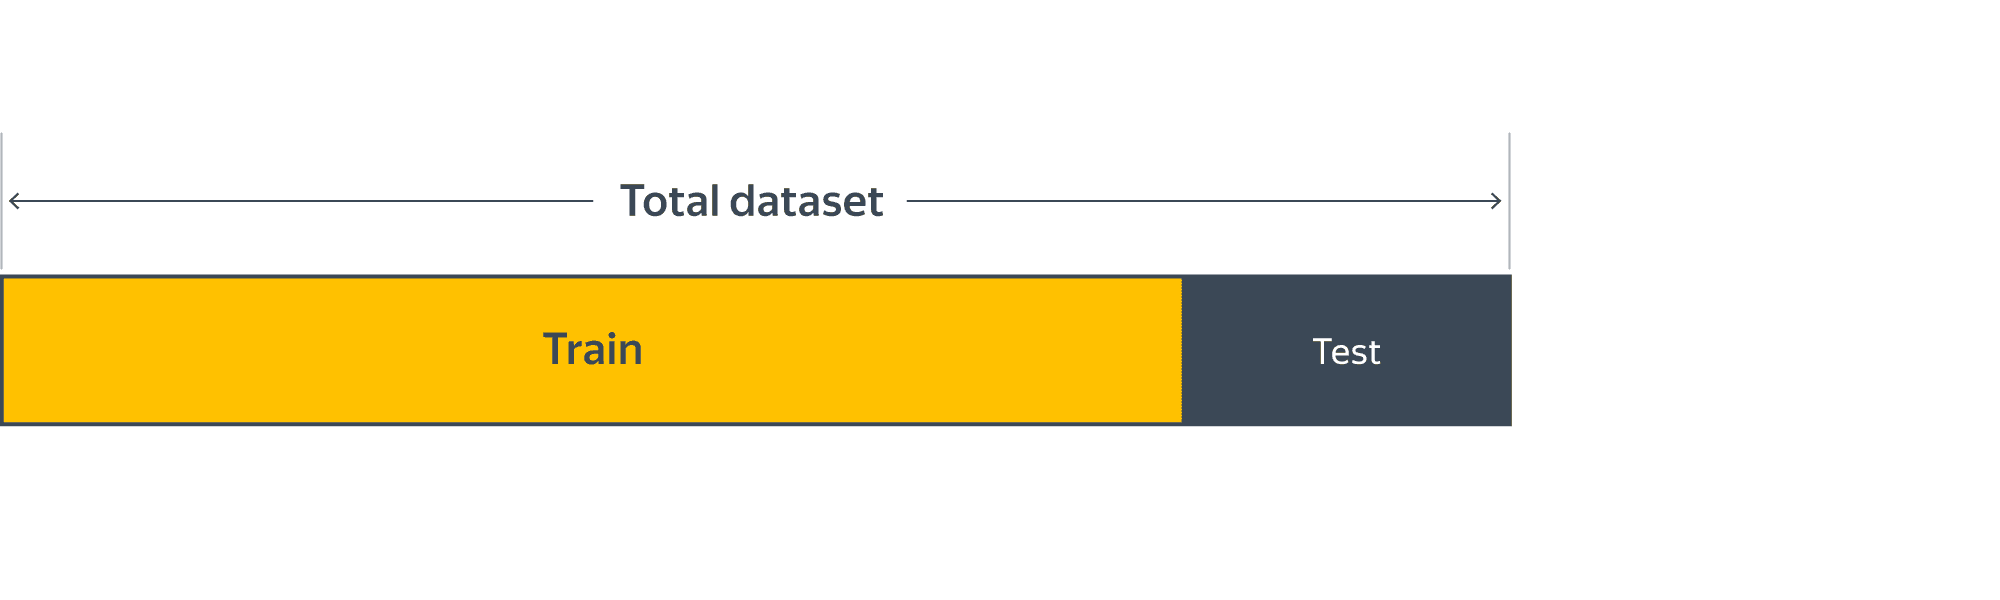
#### Преимущества
- Метод прост и легкодоступен для реализации
- Время выполнения меньше.
#### Недостатки
Если сам набор данных невелик, выделение отдельных частей для тестирования снизило бы надежность модели. Это связано с тем, что обучающая выборка может быть репрезентативной не для всего набора данных.
Показатели оценки могут варьироваться из-за случайности разделения между поездом и тестовым набором.
Несмотря на то, что широко применяется разделение на 80-20 для разбиения на обучающую и тестовую выборку, для разделения нет общего правила, и, следовательно, результаты могут варьироваться в зависимости от того, как выполняется разделение теста поезда.

### 2. Перекрестная проверка с исключением примеров по одному (Leave One Out Cross Validation, LOOCV)

В этом методе, если в наборе данных имеется n наблюдений, только одно наблюдение резервируется для тестирования, а остальные точки данных используются для обучения. Это повторяется n раз до тех пор, пока все точки данных не будут использованы для целей тестирования на каждой итерации. Наконец, средняя точность вычисляется путем объединения точностей каждой итерации.
#### Преимущества
- Поскольку все данные используются как для обучения, так и для тестирования, общая точность становится более надежной.
- Это очень полезно, когда набор данных невелик.
#### Недостатки
- LOOCV непрактично использовать, когда количество наблюдений за данными n огромно. Например, представьте набор данных с 500 000 записей, тогда необходимо создать 500 000 моделей, что на самом деле неосуществимо.
- Подход LOOCV сопряжен с огромными вычислительными и временными затратами.
### 3. K-кратная перекрестная проверка (K-Fold Cross-Validation)
При K-кратной кросс-валидации набор данных разбивается на K подмножестк. На 1-й итерации первый срез данных резервируется для тестирования, и модель обучается на данных оставшихся k-1 срезов.
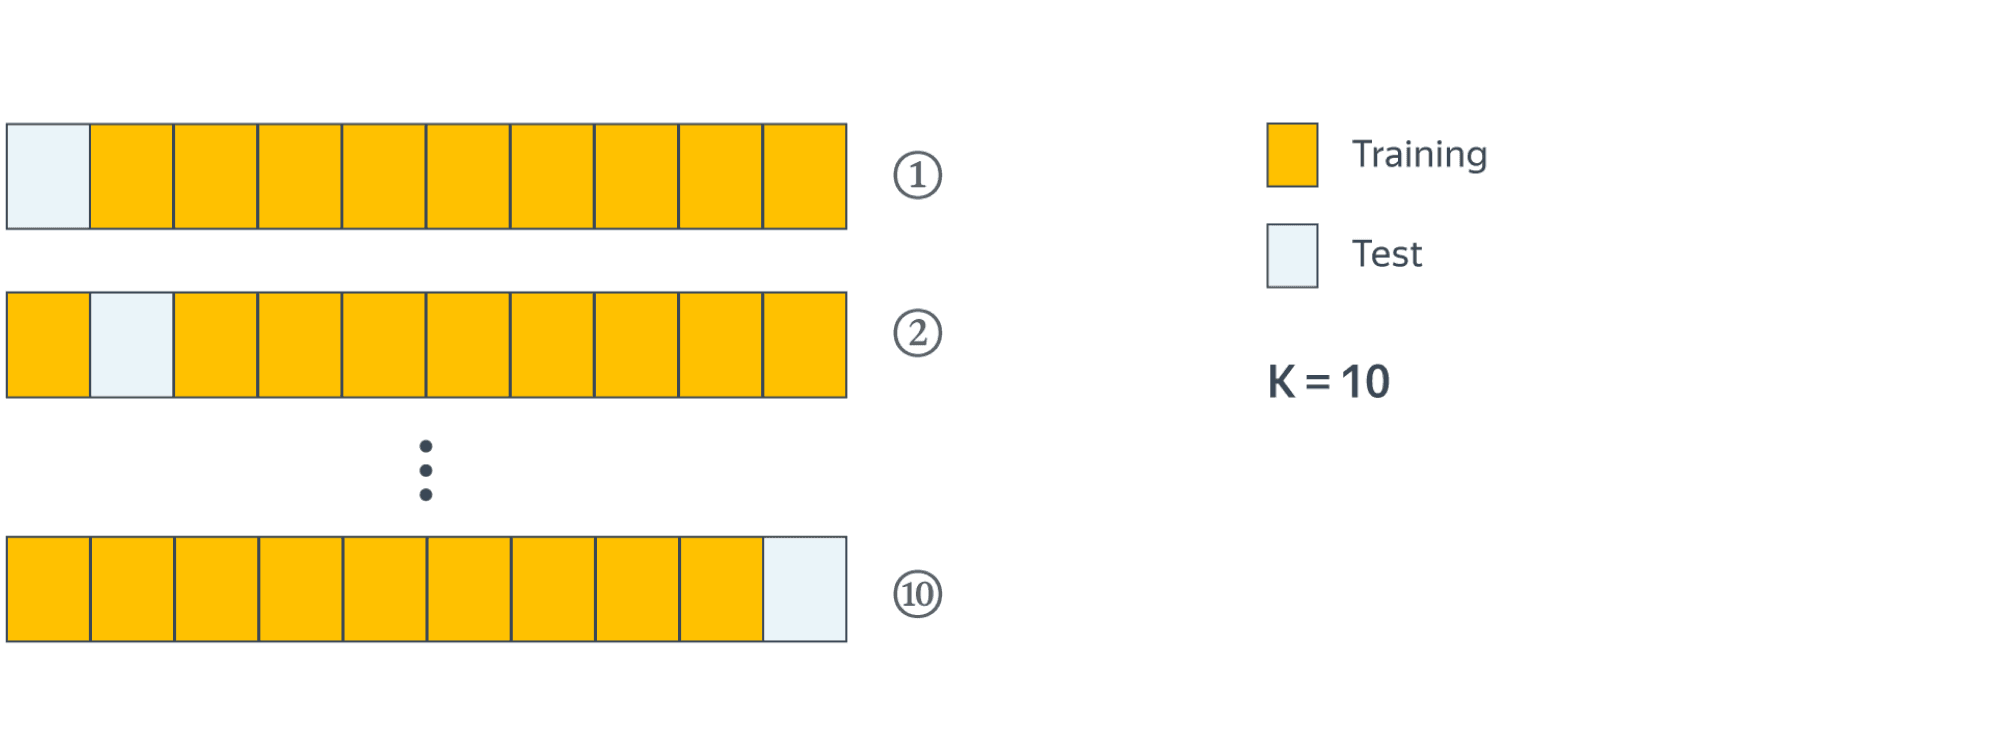
На следующей итерации второй срез резервируется для тестирования, а остальные срезы используются для обучения. Это продолжается до K-й итерации. Точность, полученная на каждой итерации, используется для определения общей средней точности модели.

#### Преимущества
- K-крастная кросс-валидация полезна, когда набор данных невелик и разбиение невозможно разделить в наборе обучающих тестов (метод удержания) без потери полезных данных для обучения.
- Подход помогает создать надежную модель с низкой дисперсией и низким смещением, поскольку она обучается на всех данных
#### Недостатки
- Основным недостатком K-кратной перекрестной проверки является то, что обучение необходимо проводить K раз и, следовательно, оно потребляет больше времени и ресурсов,
- Подход не рекомендуется использовать с данными последовательных временных рядов.
- Когда набор данных несбалансирован, K-кратная перекрестная проверка может не дать хороших результатов. Это связано с тем, что в некоторых фолдах может быть всего несколько или вообще никаких записей, принадлежащих к миноритарным классам.

### 4. Стратифицированная K-кратная перекрестная проверка (Stratified K-Fold Cross-Validation)
Стратифицированная K-кратная перекрестная проверка полезна, когда данные несбалансированы. При выборке данных в K-образные сгибы обеспечивается сохранение распределения всех классов в каждом сгиб. Например, если в наборе данных 98% данных относятся к классу B и 2% - к классу A, стратифицированная выборка гарантирует, что каждый сгиб содержит два класса в одинаковом соотношении 98% к 2%.

#### Преимущество
- Стратифицированная K-кратная перекрестная проверка рекомендуется, когда набор данных несбалансирован.

### 5. Повторное случайное разбиение на обучающую и тестовую выборку (Repeated Random Test-Train Split)
Повторное случайное разделение на обучающую и тестовую выборку - это гибрид традиционного разделения тестовой выборки и метода k-кратной перекрестной проверки. В этом методе мы создаем случайные фрагменты данных в наборе обучающих/тестовых выборок, а затем повторяем этот процесс несколько раз, точно так же, как при методе перекрестной проверки.
### 6. Валидация на временных рядах
Существует такая задача, как прогнозирование временных рядов. На практике она часто возникает в форме «Что будет с показателями нашего продукта в ближайший день / месяц / год?». При этом имеются какие-то исторические данные этих показателей за предыдущее время, которые можно визуализировать в виде некоторого графика по времени:
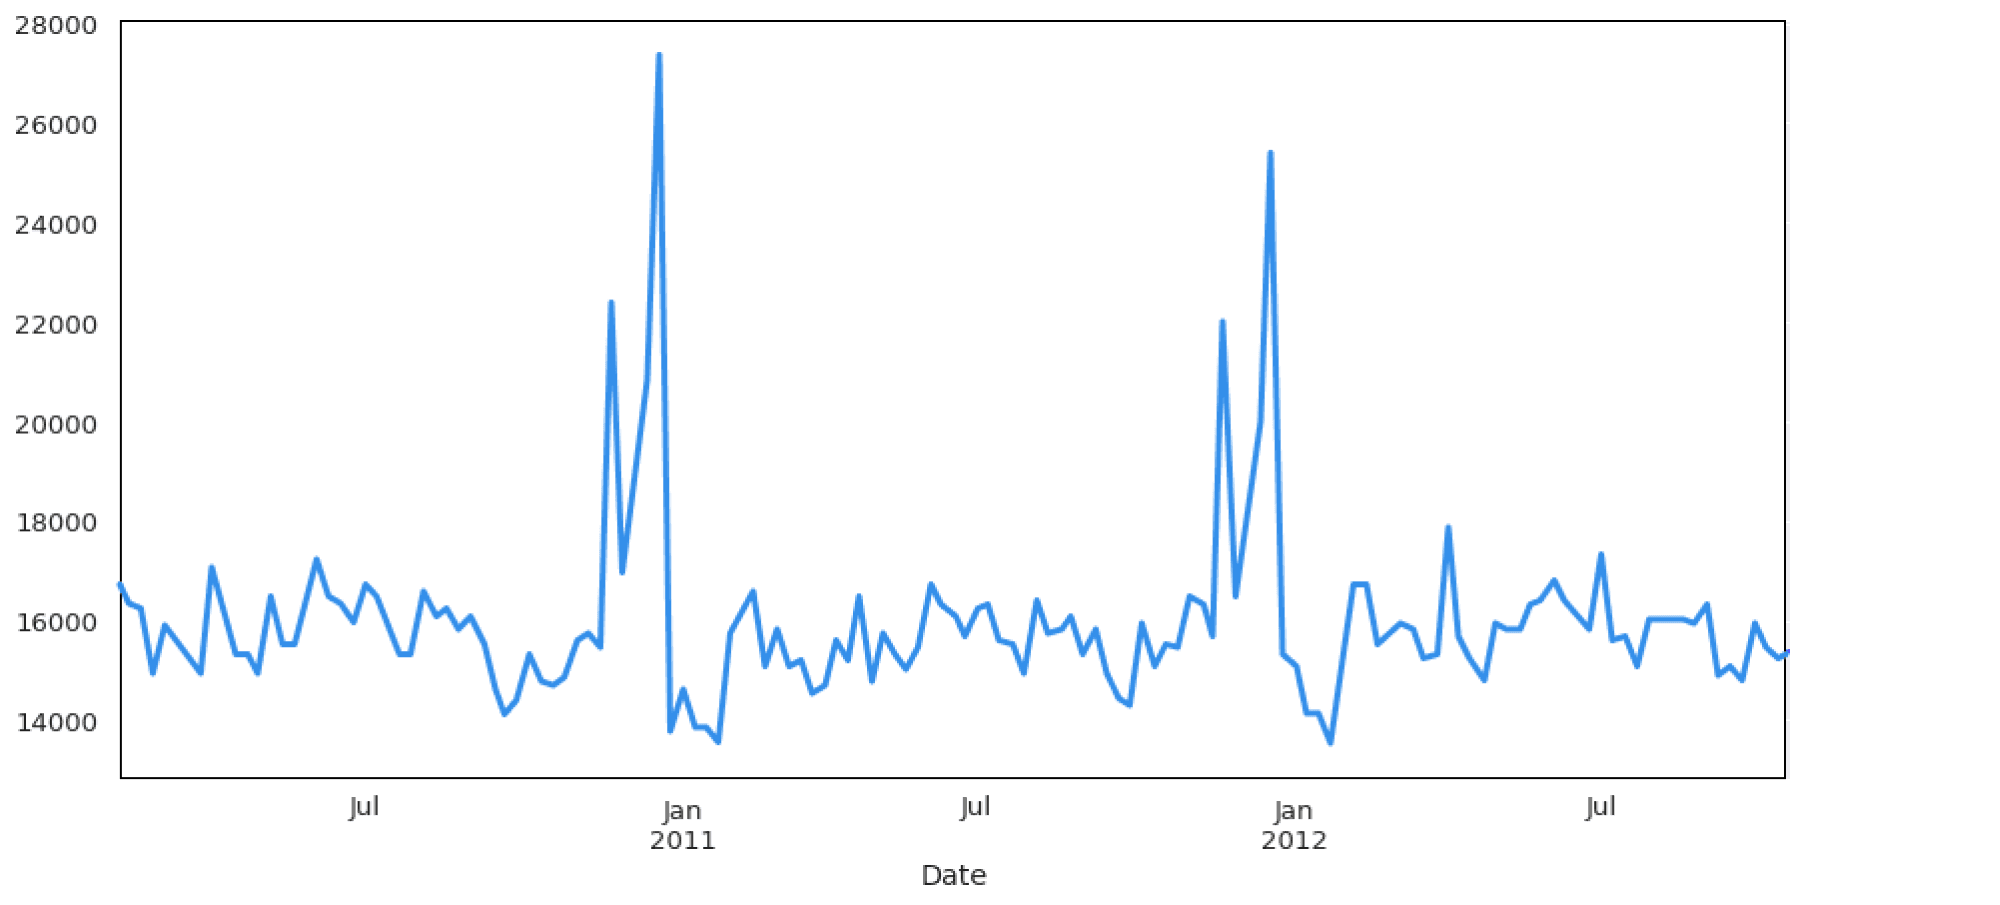
Этот график — пример графика временного ряда, и наша задача — спрогнозировать, как будет выглядеть данный график в будущие моменты времени. Кросс-валидация моделей для такой задачи осложняется тем, что данные не должны пересекаться по времени: тренировочные данные должны идти до валидационных, а валидационные — до тестовых. С учётом этих особенностей фолды в кросс-валидации для временных рядов располагаются вдоль временной оси так, как показано на следующей картинке:
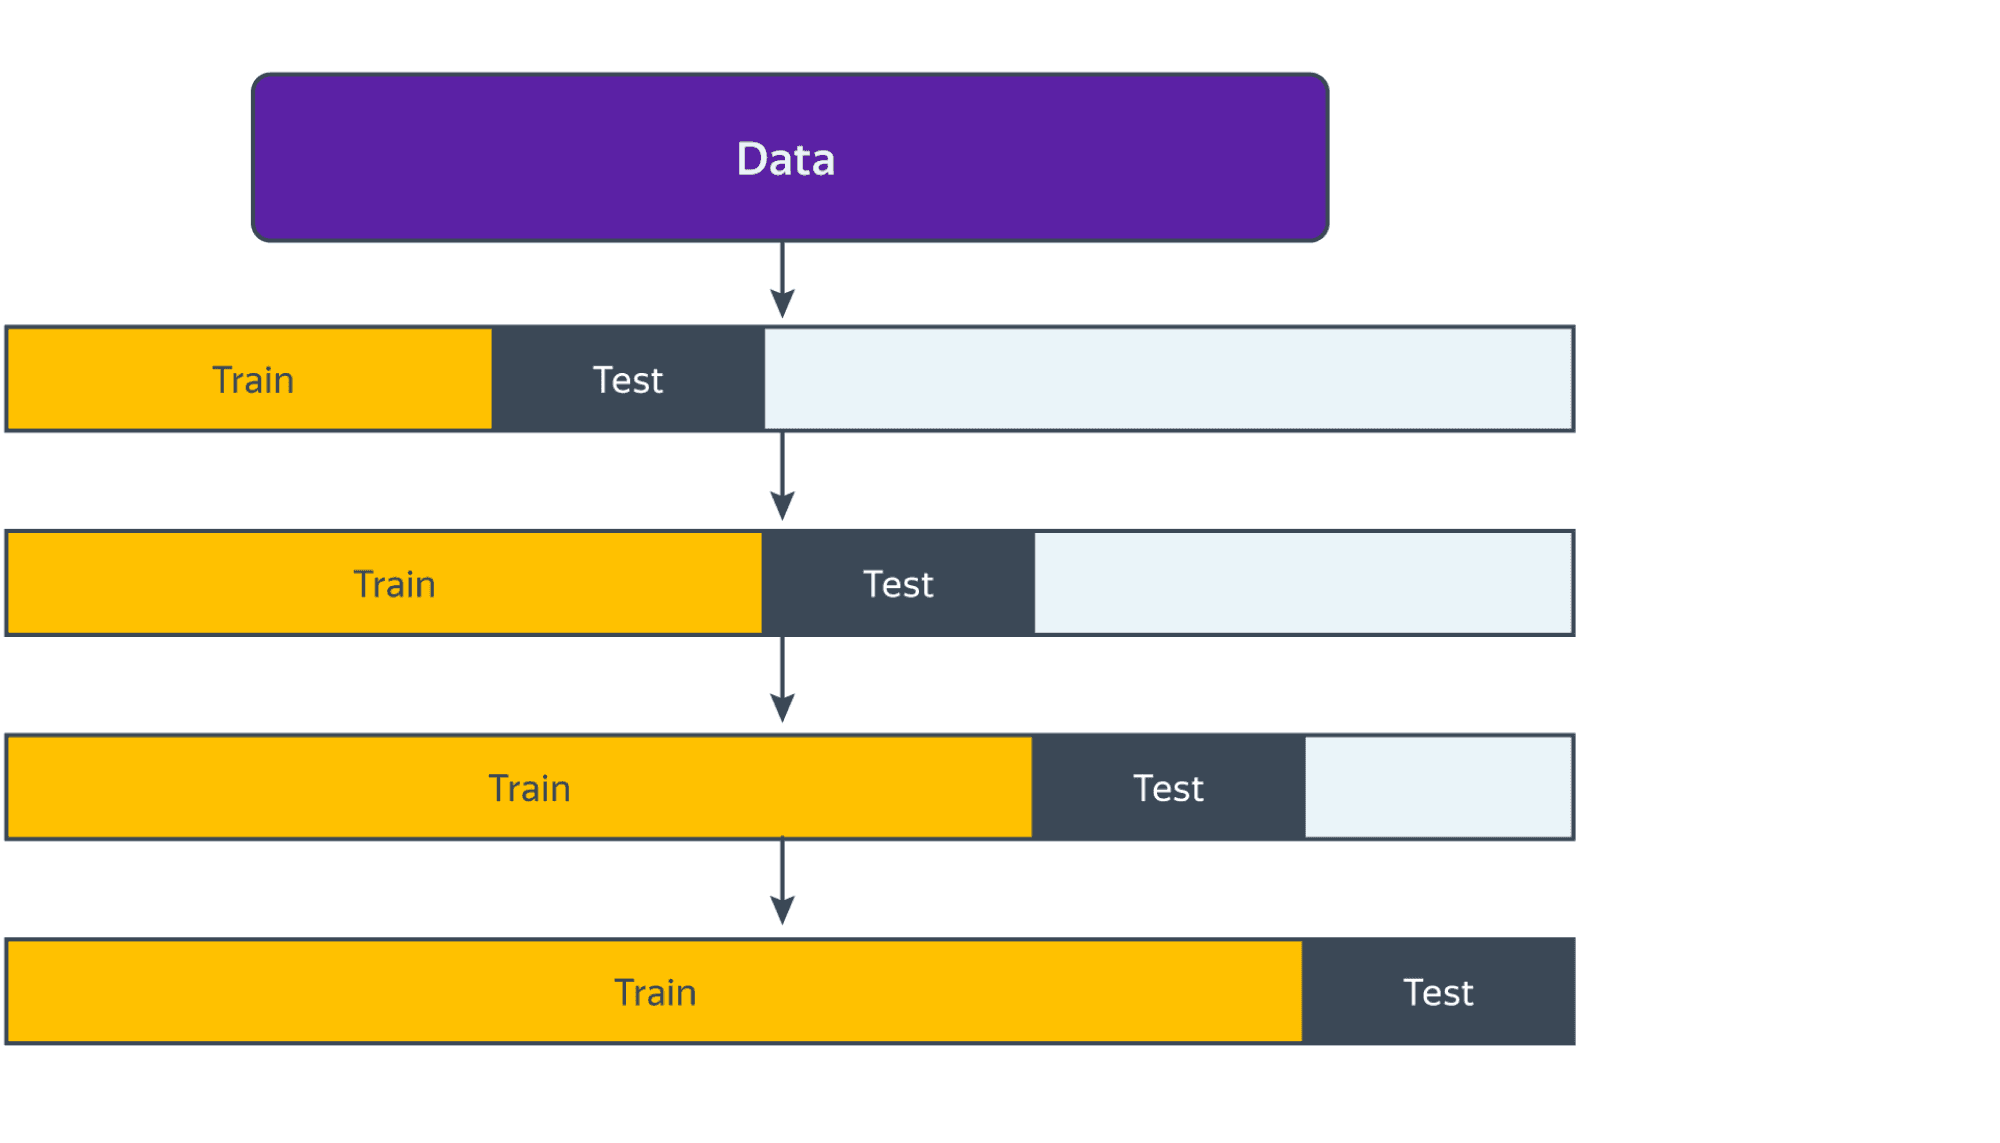

## Примеры кросс-валидации с библиотекой Sklearn
### О выборке данных
Мы будем использовать набор данных о болезни Паркинсона для всех примеров перекрестной проверки в библиотеке Sklearn. Цель состоит в том, чтобы предсказать, есть ли у конкретного пациента болезнь Паркинсона или нет. Во всех примерах мы будем использовать алгоритм дерева решений.

Набор данных содержит 21 атрибут и 195 строк. Ниже приведены различные поля набора данных о болезни Паркинсона –

- **MDVP:Fo** (Гц) – Средняя основная частота голоса
- **MDVP:Fhi** (Гц) – Максимальная основная частота голоса
- **MDVP:Flo** (Гц) – Минимальная основная частота голоса
- **MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP** – Несколько показателей изменения основной частоты
- **MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA**  – Несколько показателей изменения амплитуды
- **NHR,HNR** – – два показателя отношения шума к тональным составляющим в голосе
- **status** – Состояние здоровья субъекта (единица) – болезнь Паркинсона, (ноль) – здоровый
- **RPDE,D2** – Два показателя нелинейной динамической сложности
- **DFA** – Показатель фрактального масштабирования сигнала
- **spread1,spread2PPE** – Три нелинейных показателя изменения основной частоты

Полезное дополнительное чтение по теме: https://machinelearningknowledge.ai/decision-tree-classifier-in-python-sklearn-with-example/

### Импорт библиотек
На первом этапе импортируем необходимые библиотеки:


In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

### Чтение данных CSV в Pandas
Далее мы загружаем набор данных из CSV-файла во фреймы данных pandas и проверяем верхние 5 строк.

In [2]:
df=pd.read_csv(r"Data/Parkinsson disease.csv")
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


### Предобработка данных
Столбец “имя” не добавит никакой информации для обучения модели и может быть отброшен.

In [3]:
df.drop(df.columns[0], axis = 1, inplace = True)

Далее мы разделим данные на входные переменные и марицу целевых классов, как показано ниже.

In [4]:
# Зависимые и независимые переменные
X=df.drop('status', axis=1)
y=df['status']

### Однократное разбиение (Hold-out - подход) с использованием Sklearn
The hold-out approach can be applied by using train_test_split module of sklearn.model_selection
In the below example we have split the dataset to create the test data with a size of 30% and train data with a size of 70%. The random_state number ensures the split is deterministic in every run.

Однократное разбиение может быть реализовано с помощью модуля `train_test_split` из `sklearn.model_selection`
В приведенном ниже примере мы разделили набор данных, чтобы создать тестовые данные размером 30% и обучающие данные размером 70%. Число `random_state` гарантирует, что разделение является детерминированным при каждом запуске.

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

result = model.score(X_test, y_test)
print(result)

0.8305084745762712


###  K-кратная перекрестная проверка (K-Fold Cross-Validation)
K-кратная перекрестная проверка в Sklearn может быть применена с помощью модуля `cross_val_score` библиотеки `sklearn.model_selection`.

В приведенном ниже примере используются 10 срезов, которые дают 10 оценок точности, используя которые мы рассчитали средний балл.

In [6]:
from sklearn.model_selection import cross_val_score

model=DecisionTreeClassifier() 
kfold_validation=KFold(10)

results=cross_val_score(model,X,y,cv=kfold_validation)
print(results)
print(np.mean(results))

[0.9        0.55       0.75       0.8        0.95       0.73684211
 0.89473684 0.78947368 0.63157895 0.36842105]
0.7371052631578947


### Стратифицированная K-кратная перекрестная проверка (Stratified K-Fold Cross-Validation)
В Sklearn стратифицированная K-кратная перекрестная проверка может быть применена с помощью модуля `StratifiedKFold` `sklearn.model_selection`

В приведенном ниже примере набор данных разделен на 5 разделов или срезов. Он возвращает 5 оценок точности, используя которые мы вычисляем итоговый средний балл.

In [10]:
from sklearn.model_selection import StratifiedKFold, cross_validate

skfold=StratifiedKFold(n_splits=5)

model=DecisionTreeClassifier()
scoring = ['accuracy', 'precision', 'recall', 'f1']
scores= cross_validate(model,X,y,cv=skfold, scoring=scoring)

print(scores)
#print(np.mean(scores))

{'fit_time': array([0.00399518, 0.0039959 , 0.00350952, 0.00299478, 0.00249839]), 'score_time': array([0.00601554, 0.00581503, 0.00356007, 0.00398898, 0.00399303]), 'test_accuracy': array([0.76923077, 0.66666667, 0.84615385, 0.58974359, 0.71794872]), 'test_precision': array([0.81818182, 0.79310345, 0.96      , 0.74074074, 0.75      ]), 'test_recall': array([0.9       , 0.76666667, 0.82758621, 0.68965517, 0.93103448]), 'test_f1': array([0.85714286, 0.77966102, 0.88888889, 0.71428571, 0.83076923])}


### Перекрестная проверка с исключением примеров по одному (Leave One Out Cross Validation, LOOCV)

В Sklearn перекрестная проверка Leave One Out (LOOCV) может быть применена с помощью модуля `Leave One Out` библиотеки`sklearn.model_selection`

In [8]:
from sklearn.model_selection import LeaveOneOut

model=DecisionTreeClassifier()

leave_validation=LeaveOneOut()

results=cross_val_score(model,X,y,cv=leave_validation)

results

array([1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 0., 1., 0., 0., 1., 0., 0.])

Оценим общую точность моделей, усреднив оценки.

In [9]:
print(np.mean(results))

0.8666666666666667


### Повторное случайное разбиение на обучающую и тестовую выборку (Repeated Random Test-Train Split)
В Sklearn повторные случайные разбиения тестовой последовательности могут быть применены с помощью модуля `ShuffleSplit` `sklearn.model_selection`

In [10]:
from sklearn.model_selection import ShuffleSplit

model=DecisionTreeClassifier()
ssplit=ShuffleSplit(n_splits=10,test_size=0.30)
results=cross_val_score(model,X,y,cv=ssplit)

print(results)
print(np.mean(results))

[0.84745763 0.88135593 0.86440678 0.89830508 0.79661017 0.91525424
 0.84745763 0.79661017 0.88135593 0.83050847]
0.8559322033898304


В sklearn реализована схема кросс-валидации для временных рядов с помощью класса `TimeSeriesSplit` модуля `model_selection`

In [11]:
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4, 5, 6])
tscv = TimeSeriesSplit()
print(tscv)
 
for train_index, test_index in tscv.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
TRAIN: [0] TEST: [1]
TRAIN: [0 1] TEST: [2]
TRAIN: [0 1 2] TEST: [3]
TRAIN: [0 1 2 3] TEST: [4]
TRAIN: [0 1 2 3 4] TEST: [5]
